In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from altaipony.flarelc import FlareLightCurve

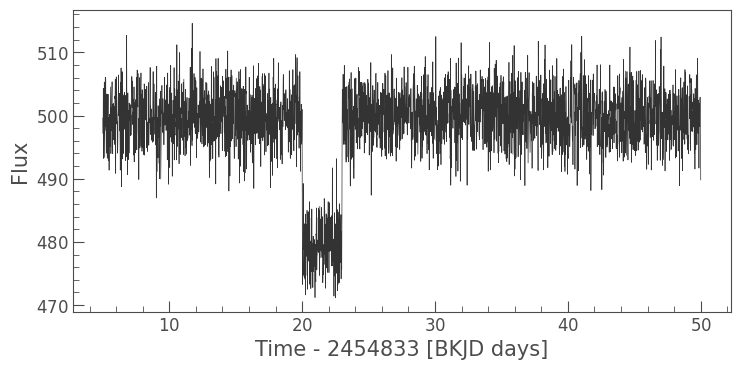

In [75]:
time = np.linspace(5,50,3000)
flux =  500 + np.random.normal(0,4,len(time))#np.sin(time*.3)*10 +
flux[1000:1200] -= 20
flux_err = np.abs(np.random.normal(0,4,len(time)))
flc = FlareLightCurve(time=time, flux=flux, flux_err=flux_err)
flc.plot();

In [111]:
from pytransit import UniformModel

tm = UniformModel()
tm.set_data(time)
k = np.sqrt(20/500)
t0 = flc.time[1100].value
p = 90.
a = 10.
i = np.pi/2
e = .0
w = .0
pv = (k, t0, p, a, i, e, w)
vals = tm.evaluate(*pv)

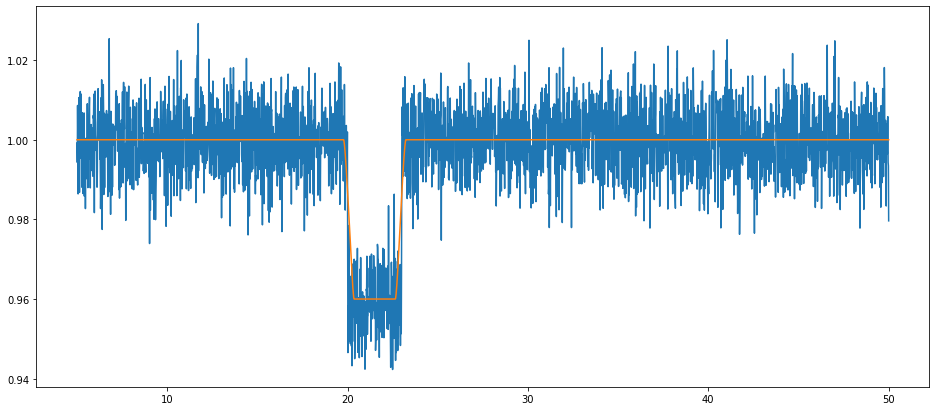

In [112]:
fig, ax = plt.subplots(1, figsize=(16,7))
plt.plot(time, flux/500)
plt.plot(time, vals)


In [113]:
from pytransit.lpf import BaseLPF

In [120]:
BLPF = BaseLPF("Transits",  #name: str, just some identifier 
                ["optical"], #passbands: list, 
                times=flc.time.value.reshape(1, len(flc.flux)),#times: list = None, 
                fluxes=flc.flux.value.reshape(1,len(flc.flux)), #fluxes: Iterable[T_co] = None, 
                errors=flc.flux_err.value.reshape(1,len(flc.flux)),#flc.flux_err.value,#errors: list = None, 
                pbids=[0],#pbids: list = None, 
                #covariates: list = None, 
                #wnids: list = None, 
                tm=tm, #tm: pytransit.models.transitmodel.TransitModel = None, 
                #nsamples: tuple = 1, 
                #exptimes: tuple = 0.0, 
                #init_data=True, 
                #result_dir: pathlib.Path = None, 
                #tref: float = 0.0, 
                #lnlikelihood: str = 'wn'
               )

In [121]:
BLPF.lnlikelihood(pv)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<built-in function min>) found for signature:
 
 >>> min(array(float64, 1d, C), float64)
 
There are 6 candidate implementations:
[1m   - Of which 4 did not match due to:
   Overload of function 'min': File: <numerous>: Line N/A.
     With argument(s): '(array(float64, 1d, C), float64)':[0m
[1m    No match.[0m
[1m   - Of which 2 did not match due to:
   Overload in function 'iterable_min': File: numba/cpython/builtins.py: Line 564.
     With argument(s): '(array(float64, 1d, C), float64)':[0m
[1m    Rejected as the implementation raised a specific error:
      TypeError: iterable_min() takes 1 positional argument but 2 were given[0m
  raised from /home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/numba/core/typing/templates.py:722
[0m
[0m[1mDuring: resolving callee type: Function(<built-in function min>)[0m
[0m[1mDuring: typing of call at /home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/pytransit/models/numba/ma_uniform_nb.py (110)
[0m
[1m
File "../../../000_envs/forallpurposes/lib/python3.6/site-packages/pytransit/models/numba/ma_uniform_nb.py", line 110:[0m
[1mdef uniform_z_s(z, k, zsign):
    <source elided>
    else:
[1m        kap1 = arccos(min((1.0 - k * k + z * z) / 2.0 / z, 1.0))
[0m        [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function uniform_z_s at 0x7f788c80c510>))[0m
[0m[1mDuring: typing of call at /home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/pytransit/models/numba/ma_uniform_nb.py (160)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function uniform_z_s at 0x7f788c80c510>))[0m
[0m[1mDuring: typing of call at /home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/pytransit/models/numba/ma_uniform_nb.py (160)
[0m
[1m
File "../../../000_envs/forallpurposes/lib/python3.6/site-packages/pytransit/models/numba/ma_uniform_nb.py", line 160:[0m
[1mdef uniform_model_v(t, k, t0, p, a, i, e, w, lcids, pbids, nsamples, exptimes, zsign):
    <source elided>
                    else:
[1m                        flux[ipv, j] += uniform_z_s(z, _k, 1.0)
[0m                        [1m^[0m[0m
